In [1]:
# Import some required libraries. Some libraries will be imported later if needed.
import numpy as np 
import pandas as pd 
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob
import os

In [2]:
data_dir=r'C:/Users/polit/OneDrive/Desktop/fruits-360/Ours/Training'

In [3]:
batch_size=16
image_size=(100, 100)
fruit_classes=['Apple Golden', 'Apple Granny Smith', 
                'Apple Red', 'Avocado', 'Banana', 'Blueberry', 
                 'Cocos', 'Grape White', 'Grape pink',
                'Kiwi', 'Lemon',  'Mango',  'Melon Piel de Sapo', 'Orange', 
                'Papaya',  'Pineapple', 'Pomegranate', 
                  'Strawberry',  
                'Watermelon']

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1. / 255,
                                    zoom_range=0.1,
                                    rotation_range=10,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
        directory=data_dir,
    target_size = (100,100),
        subset='training')


validation_generator = train_datagen.flow_from_directory(
        directory=data_dir,
    target_size = (100,100),#same as in train generator
        subset='validation')

Found 246 images belonging to 19 classes.
Found 150 images belonging to 19 classes.


In [5]:
no_of_classes = len(fruit_classes)
no_of_classes

19

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout,Activation,BatchNormalization
from keras.optimizers import Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras import backend as K
from tensorflow.keras.optimizers import Adadelta


model = Sequential()
model.add(Conv2D(filters = 112,kernel_size = (2,2),input_shape=(100,100,3)))
model.add(Activation('relu'))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(19,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 112)       1456      
_________________________________________________________________
activation (Activation)      (None, 99, 99, 112)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 64)        28736     
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 614656)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                39338048  
_________________________________________________________________
dense_1 (Dense)              (None, 19)                1

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', tf.keras.metrics.Precision()])

learned_weights = ModelCheckpoint(filepath = 'C:/Users/polit/OneDrive/Desktop/fruits-360/fruits_360_weights_multiple_keras1.hdf5', verbose = 2, save_best_only = True)

history = model.fit(train_generator,
        batch_size = 10,
        epochs=100,
        validation_data=(validation_generator),
        callbacks = [learned_weights],
        verbose=2, shuffle=True)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 2.90485, saving model to C:/Users/polit/OneDrive/Desktop/fruits-360\fruits_360_weights_multiple_keras1.hdf5
8/8 - 8s - loss: 9.7474 - accuracy: 0.0976 - precision: 0.1034 - val_loss: 2.9049 - val_accuracy: 0.0867 - val_precision: 0.0000e+00
Epoch 2/100

Epoch 00002: val_loss improved from 2.90485 to 2.54319, saving model to C:/Users/polit/OneDrive/Desktop/fruits-360\fruits_360_weights_multiple_keras1.hdf5
8/8 - 10s - loss: 2.8181 - accuracy: 0.1179 - precision: 0.0000e+00 - val_loss: 2.5432 - val_accuracy: 0.1667 - val_precision: 1.0000
Epoch 3/100

Epoch 00003: val_loss improved from 2.54319 to 2.24265, saving model to C:/Users/polit/OneDrive/Desktop/fruits-360\fruits_360_weights_multiple_keras1.hdf5
8/8 - 11s - loss: 2.4502 - accuracy: 0.1707 - precision: 0.3333 - val_loss: 2.2427 - val_accuracy: 0.2133 - val_precision: 0.4545
Epoch 4/100

Epoch 00004: val_loss improved from 2.24265 to 1.86303, saving model to C:/Users/polit/One

Epoch 35/100

Epoch 00035: val_loss did not improve from 0.29176
8/8 - 8s - loss: 0.1600 - accuracy: 0.9431 - precision: 0.9545 - val_loss: 0.5634 - val_accuracy: 0.8267 - val_precision: 0.8345
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.29176
8/8 - 8s - loss: 0.1173 - accuracy: 0.9634 - precision: 0.9712 - val_loss: 0.4289 - val_accuracy: 0.9000 - val_precision: 0.9184
Epoch 37/100

Epoch 00037: val_loss did not improve from 0.29176
8/8 - 7s - loss: 0.1066 - accuracy: 0.9715 - precision: 0.9794 - val_loss: 0.4511 - val_accuracy: 0.8467 - val_precision: 0.8639
Epoch 38/100

Epoch 00038: val_loss did not improve from 0.29176
8/8 - 8s - loss: 0.0890 - accuracy: 0.9797 - precision: 0.9797 - val_loss: 0.5404 - val_accuracy: 0.8267 - val_precision: 0.8483
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.29176
8/8 - 7s - loss: 0.2064 - accuracy: 0.9187 - precision: 0.9300 - val_loss: 0.5028 - val_accuracy: 0.8667 - val_precision: 0.8716
Epoch 40/100

Epoch 00040: val

Epoch 75/100

Epoch 00075: val_loss did not improve from 0.20570
8/8 - 9s - loss: 0.0448 - accuracy: 0.9756 - precision: 0.9754 - val_loss: 0.2862 - val_accuracy: 0.9133 - val_precision: 0.9252
Epoch 76/100

Epoch 00076: val_loss did not improve from 0.20570
8/8 - 11s - loss: 0.0492 - accuracy: 0.9878 - precision: 0.9878 - val_loss: 0.3688 - val_accuracy: 0.8733 - val_precision: 0.8792
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.20570
8/8 - 15s - loss: 0.0220 - accuracy: 0.9919 - precision: 0.9919 - val_loss: 0.4682 - val_accuracy: 0.8667 - val_precision: 0.8667
Epoch 78/100

Epoch 00078: val_loss did not improve from 0.20570
8/8 - 21s - loss: 0.0421 - accuracy: 0.9919 - precision: 0.9918 - val_loss: 0.4688 - val_accuracy: 0.8800 - val_precision: 0.8904
Epoch 79/100

Epoch 00079: val_loss did not improve from 0.20570
8/8 - 25s - loss: 0.0520 - accuracy: 0.9837 - precision: 0.9918 - val_loss: 0.2477 - val_accuracy: 0.9200 - val_precision: 0.9262
Epoch 80/100

Epoch 00080:

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
# model = load_model('C:/Users/polit/OneDrive/Desktop/fruits-360/image_data.hdf5')



model = load_model('C:/Users/polit/OneDrive/Desktop/fruits-360/fruits_360_weights_multiple_keras1.hdf5')

In [9]:
score = model.evaluate(validation_generator, verbose=0)

# score contains the metrics passed in the compile method. Here: loss, accuracy, and precision
print(model.metrics_names)
print(score)

['loss', 'accuracy', 'precision']
[0.2690315246582031, 0.9399999976158142, 0.9463087320327759]


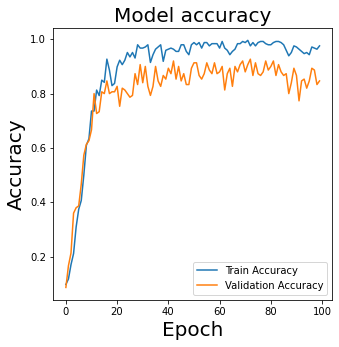

In [10]:
import matplotlib.pyplot as plt 
#plt.figure(1)  
fig = plt.figure(figsize=(5,5))   
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title('Model accuracy',fontsize=20)  
plt.ylabel('Accuracy',fontsize=20)  
plt.xlabel('Epoch',fontsize=20)
plt.legend()
plt.show()


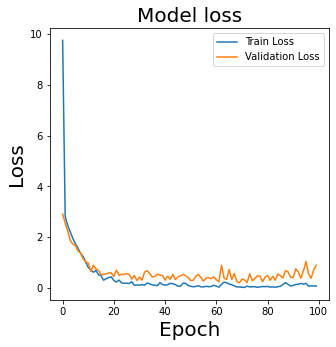

In [11]:
#plt.subplot(212)  
fig = plt.figure(figsize=(5,5)) 
plt.plot(history.history['loss'],label = "Train Loss")  
plt.plot(history.history['val_loss'],label = "Validation Loss")  
plt.title('Model loss',fontsize=20)  
plt.ylabel('Loss',fontsize=20)  
plt.xlabel('Epoch',fontsize=20)   
plt.legend()
plt.show()